In [1]:
import utils
import numpy as np

from collections import defaultdict
import re
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

# [Day 4 Repose Record](https://adventofcode.com/2018/day/4)

We have timestamped records of guards on duty at midnight for an hour:

- guard X begins shift
- falls asleep
- wakes up

the input:

In [2]:
inp = utils.get_input(4).splitlines()
inp[:5]

['[1518-03-11 00:45] wakes up',
 '[1518-07-13 00:13] falls asleep',
 '[1518-11-02 23:56] Guard #3463 begins shift',
 '[1518-11-13 00:59] wakes up',
 '[1518-06-15 23:59] Guard #829 begins shift']

lets sort this:

In [3]:
inp = sorted(inp)
inp[:5]

['[1518-02-24 23:57] Guard #1913 begins shift',
 '[1518-02-25 00:17] falls asleep',
 '[1518-02-25 00:29] wakes up',
 '[1518-02-25 00:54] falls asleep',
 '[1518-02-25 00:56] wakes up']

The simple alphabetical sort looks like it has sorted this timewise as well. 
Test input to run code on first:

In [4]:
test_input = """
[1518-11-01 00:00] Guard #10 begins shift
[1518-11-01 00:05] falls asleep
[1518-11-01 00:25] wakes up
[1518-11-01 00:30] falls asleep
[1518-11-01 00:55] wakes up
[1518-11-01 23:58] Guard #99 begins shift
[1518-11-02 00:40] falls asleep
[1518-11-02 00:50] wakes up
[1518-11-03 00:05] Guard #10 begins shift
[1518-11-03 00:24] falls asleep
[1518-11-03 00:29] wakes up
[1518-11-04 00:02] Guard #99 begins shift
[1518-11-04 00:36] falls asleep
[1518-11-04 00:46] wakes up
[1518-11-05 00:03] Guard #99 begins shift
[1518-11-05 00:45] falls asleep
[1518-11-05 00:55] wakes up""".strip().splitlines()
test_input[:2]

['[1518-11-01 00:00] Guard #10 begins shift',
 '[1518-11-01 00:05] falls asleep']

Now to parse the input. I'm using a an array of length 60 so I can track the exact minutes a guard is sleeping:

In [5]:
date_format = '%Y-%m-%d %H:%M'

def parse_input(inp):
    guards = defaultdict(lambda: np.zeros(60))
    
    for event in sorted(inp):
        
        t, txt = event[1:].split("] ")
        date = datetime.strptime(t, date_format)

        if "Guard" in txt:
            guard = int(re.findall("[\d]+", txt)[0])
        elif "asleep" in txt:
            start = date.minute
        elif "wakes" in txt:
            end = date.minute
            guards[guard][start:end] += 1
            
    return guards

guards = parse_input(test_input)
guards

defaultdict(<function __main__.parse_input.<locals>.<lambda>()>,
            {10: array([0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                    1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
                    1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
                    1., 1., 1., 1., 0., 0., 0., 0., 0.]),
             99: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                    0., 0., 1., 1., 1., 1., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 1.,
                    1., 1., 1., 1., 0., 0., 0., 0., 0.])})

So now we have a dict of guards along with a list of how often they are sleeping at a given minute.

so lets find out which guard sleeps the most:

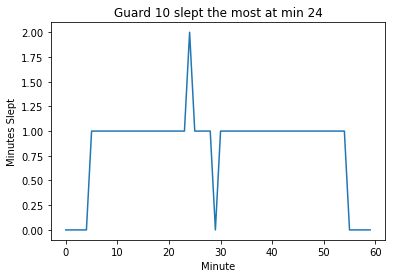

Guard 10 slept a total of 50.0 and slept the most in minute 24
Part 1 Ans: 240


In [8]:
def max_sleeper(guards):
    "lets find the guard which sleeps the most"
    mm = [] 
    
    for guard, mins in guards.items():
        mm.append((guard, mins.sum()))
    guard, total_sleep = sorted(mm, key=lambda x: x[1], reverse=True)[0]
    max_sleep_min = np.argmax(guards[guard])
    
    plt.plot(np.arange(60), guards[guard])
    plt.title(f"Guard {guard} slept the most at min {max_sleep_min}")
    plt.xlabel("Minute")
    plt.ylabel("Minutes Slept")
    plt.show()
    
    print(f"Guard {guard} slept a total of {total_sleep} and slept the most in minute {max_sleep_min}")
    print(f"Part 1 Ans: {guard * max_sleep_min}") 

max_sleeper(guards)

Now for the real input:

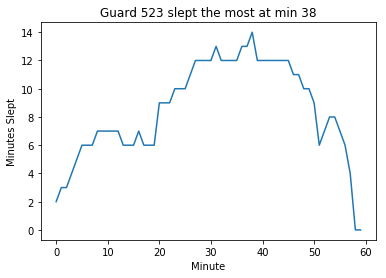

Guard 523 slept a total of 511.0 and slept the most in minute 38
Part 1 Ans: 19874


In [9]:
guards = parse_input(inp)
max_sleeper(guards)

# Part 2

Which guard is most asleep at the same minute? So which is the most slept on minute by a guard?

We already have a dict of guards and minutes slept on, so this one is easy:

Guard 463 slept the most at min 49


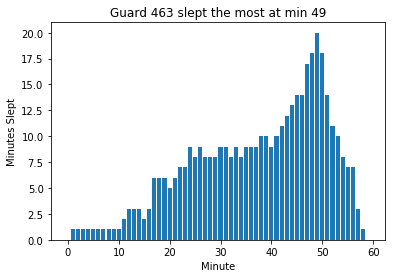

22687

In [10]:
def part_2(guards=guards):
    g = [(guard, np.argmax(minutes)) for guard, minutes in guards.items()]
    g = sorted(g, key=lambda x: x[1])
    guard, m = g[-1]
    print(f"Guard {guard} slept the most at min {m}")
    
    plt.bar(np.arange(60), guards[guard])
    plt.title(f"Guard {guard} slept the most at min {m}")
    plt.xlabel("Minute")
    plt.ylabel("Minutes Slept")
    plt.show()
    
    return guard * m

part_2()    